#### Feature Engineering

Handling missing values in the data set - Caused due to technical errors, privacy concerns, human errors.

We know that machine learning algorithms use some input data to produce results. But quite often, the data you’ve been given might not be enough for designing a good machine learning model. That’s where the power of feature engineering comes into play.

Goals:

Preparing the proper input dataset, compatible with the machine learning algorithm requirements

Improving the performance of machine learning models

7 Techniques of feature engineering:

    1. Imputation
    2. Handling Outliers
    3. Binning
    4. Log Transform
    5. One-Hot Encoding
    6. Grouping Operations
    7. Scaling


#### Types of missing Data


  Before proceeding to feature the missing values, we have to know the type of data that is missing to perform a specific technique on the data set.
  
  
  1. Missing completely at Random (MCAR):  data are missing is independent of the observed and unobserved data.
  2. Missing at Random (MAR):  data are missing is dependent of the observed and but not on unobserved data.
  3. Missing Not at Random (MNAR):  data are missing is dependent of the unobserved data.

#### Techniques for continuous values

1. Mean median mode replacement
2. Random sample Imputation
3. Capturning NAN values with a new feature
4. End of distribution imputation
5. Arbitary imputation
6. Frequent categories imputation

#### Mean - median - mode Imputation

Replace the missing values with mean/median/mode - MCAR

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [52]:
df1 = pd.read_csv('train.csv', usecols = ['Age', 'Survived', 'Fare'])
df1

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [34]:
df1['Age'][99]

34.0

In [6]:
median = df1['Age'].median()
mean = df1['Age'].mean()
mode = df1['Age'].mode()
print(mean, median, mode)

29.69911764705882 28.0 0    24.0
dtype: float64


In [25]:
def imputate_nan(data, variable, median):
    data[variable+'_median'] = data[variable].fillna(median)
    #or data[variable].fillna(median) or np.where(data[variable].isnull(), median,data[variable])

In [26]:
#calculate missing values percentages
df1.isnull().mean()

Survived      0.000000
Age           0.198653
Fare          0.000000
Age_median    0.000000
dtype: float64

In [40]:
imputate_nan(df1, 'Age', median)
df1.isnull().mean()

Survived      0.000000
Age           0.198653
Fare          0.000000
Age_median    0.000000
dtype: float64

In [28]:
df1['Age'].std()

14.526497332334044

In [39]:
df1['Age_median'].mean()
#There is slight difference in the SD, ie.., std of median < std of Age implies median curve is fit than orginal curve

29.36158249158249

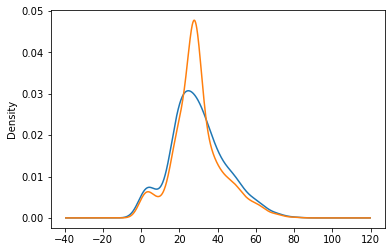

In [37]:
df1['Age'].plot(kind='kde', label='Age')
df1['Age_median'].plot(kind='kde', label='Age')
plt.show()

1. Adv: Easy to implement, faster to obtain the complete data set.
2. Disadv: There is distortion in the variance or std.

#### Random sample Replacement
Taking a random value from the data set and replace the null values with the random value. (MCAR)


In [36]:
df1['Age'].dropna().sample(df1['Age'].isnull().sum(), random_state = 0).index

Int64Index([423, 177, 305, 292, 889, 595, 637,  54, 456, 110,
            ...
            179,  24, 630, 458,  49, 539, 267, 352,  99, 689],
           dtype='int64', length=177)

In [53]:
def imputate_nan(data, variable, median):
    data[variable+'_median'] = data[variable].fillna(median)
    data[variable+'_random'] = data[variable]
    random_sample_list = data[variable].dropna().sample(data[variable].isnull().sum(), random_state = 0)
    random_sample_list.index = data[data[variable].isnull()].index
    data.loc[data[variable].isnull(), variable+'_random'] = random_sample_list

In [54]:
imputate_nan(df1, 'Age', median)

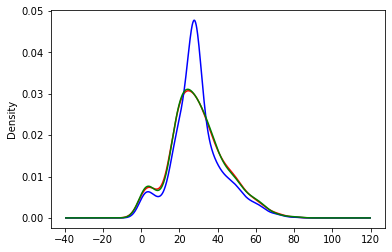

In [62]:
df1['Age'].plot(kind = 'kde',color='red', label='Age')
df1['Age_median'].plot(kind = 'kde',color='blue', label ='Age median')
df1['Age_random'].plot(kind = 'kde',color='green', label ='Age random')
plt.show()

Advantages: 
1. Easy to implement
2. Less distortion 

Disadvantages: 
1. Not applicable for all the datasets.

#### Capturing NAN with a new feature

MNAR - When we have to capture the missing values.

In [66]:
def impute_nan_capture(df, variable, median):
    df[variable+'_capture'] = np.where(df[variable].isnull(),1,0)
    df[variable].fillna(median, inplace=True)

In [67]:
df2 = pd.read_csv('train.csv', usecols=['Age', 'Survived'])
impute_nan_capture(df2, 'Age', df2['Age'].median())
df2.head(10)

,Survived,Age,Age_capture
0,0,22.0,0
1,1,38.0,0
2,1,26.0,0
3,1,35.0,0
4,0,35.0,0
5,0,28.0,1
6,0,54.0,0
7,0,2.0,0
8,1,27.0,0
9,1,14.0,0


Advantages:
1. Easy to implement
2. Capturing the missing values

Disadvantages:
1. Curse of dimensionality - creating additional features.

#### End of Distribution 

If there is suspicion that the missing value is not at random then capturing that information is important. In this scenario, one would want to replace missing data with values that are at the tails of the distribution of the variable. MNAR

In [68]:
df3 = pd.read_csv('train.csv', usecols=['Age', 'Survived'])

<AxesSubplot:>

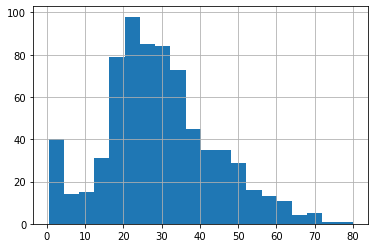

In [70]:
df3['Age'].hist(bins=20)

<AxesSubplot:xlabel='Age'>

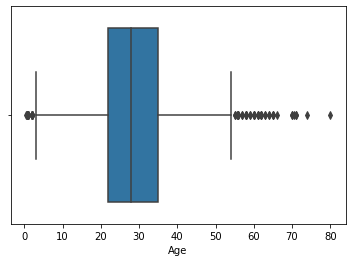

In [93]:
extreme = df3['Age'].mean()+3*df3['Age'].std()
extreme
sns.boxplot(x='Age',data=df3)

In [74]:
def impute_nan_eod(df, variable, extreme):
    df[variable+'_dis'] =df[variable].fillna(extreme)
    df[variable].fillna(df[variable].median(), inplace=True)


In [78]:
impute_nan_eod(df3, 'Age', extreme)

<AxesSubplot:>

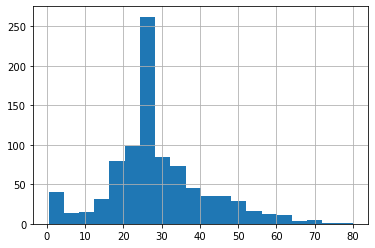

In [86]:
df3['Age'].hist(bins=20)

<AxesSubplot:>

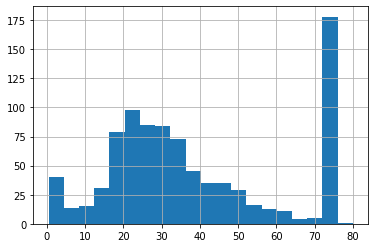

In [87]:
df3['Age_dis'].hist(bins=20)

<AxesSubplot:xlabel='Age'>

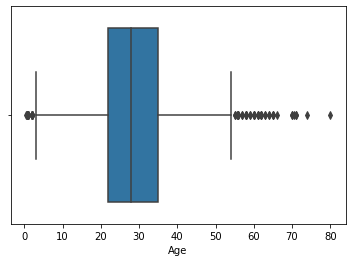

In [90]:
sns.boxplot(x='Age', data=df3)

<AxesSubplot:xlabel='Age_dis'>

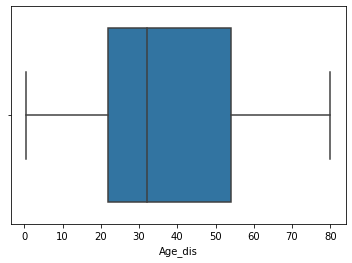

In [89]:
sns.boxplot(x='Age_dis', data=df3)

Even the outliers are captured with this end of distribution imputation

captures the missing values.

Disadv: 

1. If missingness is not important, then it might mask predictive power of orginal variable because of large distortion

#### Arbitary value Imputation 

Replace NAN values with a arbitary value. Take out of boundary values either the least or max outlier.

In [94]:
def impute_arbitary(df, variable):
    df[variable+ '_arbitary_hund'] = df[variable].fillna(100)
    df[variable+'_arbitary_zero'] = df[variable].fillna(0)

In [95]:
df4 = pd.read_csv('train.csv', usecols=['Age', 'Fare'])
impute_arbitary(df4, 'Age')

In [96]:
df4.head(10)

,Age,Fare,Age_arbitary_hund,Age_arbitary_zero
0,22.0,7.2500,22.0,22.0
1,38.0,71.2833,38.0,38.0
2,26.0,7.9250,26.0,26.0
3,35.0,53.1000,35.0,35.0
4,35.0,8.0500,35.0,35.0
5,NaN,8.4583,100.0,0.0
6,54.0,51.8625,54.0,54.0
7,2.0,21.0750,2.0,2.0
8,27.0,11.1333,27.0,27.0
9,14.0,30.0708,14.0,14.0


<AxesSubplot:xlabel='Age_arbitary_hund'>

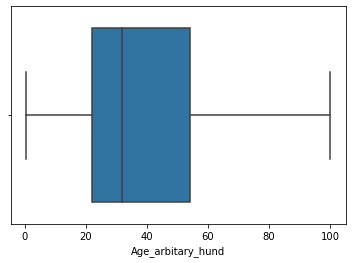

In [97]:
sns.boxplot(x='Age_arbitary_hund', data=df4)

<AxesSubplot:xlabel='Age_arbitary_zero'>

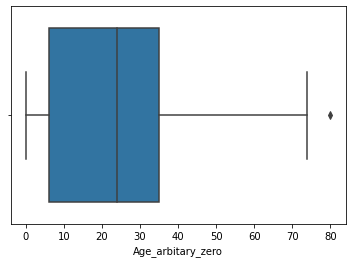

In [98]:
sns.boxplot(x='Age_arbitary_zero', data=df4)

<AxesSubplot:>

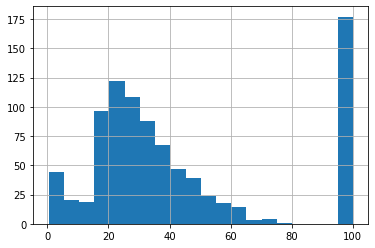

In [100]:
df4['Age_arbitary_hund'].hist(bins=20)

Adv: Easy to implement, capture the missing values.
Disadv: Distortion of orginal features.